### Week 4-8. The 2nd-order Runge-Kutta 방법 (or Heun's 방법)

룬게 쿤타 방법은 ODE를 풀때 centered difference의 아이디어를 이용하여 푸는 방법으로 Heun's 밥법이라고도 불리우며, 에러가 작은 매우 유명한 알고리즘이다.

$$ u'(t_n + \frac{1}{2} \Delta t) \approx \frac{u^{n+1}-u^{n}}{\Delta t}. $$

에러의 order 가 작은 이유는 centered difference 방법을 쓰기 때문이다: centered differnece의 에러 정도는 $\Delta t ^2$ 에 비례하는데 이는 forward나 backward dfference에 비해 한 오더 더 큰 값이다. 이는 $\Delta t ^2$ 가 2배 증가하면 정확도가 4배 상승한다는 이야기이다. 

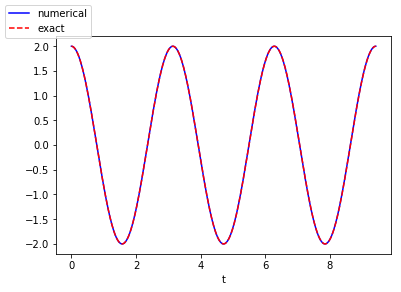

In [3]:
from numpy import zeros, linspace, pi, cos
import matplotlib.pyplot as plt

def osc_Heun(X_0, omega, dt, T):
    N_t = int(round(T/dt))
    u = zeros(N_t+1)
    v = zeros(N_t+1)
    t = linspace(0, N_t*dt, N_t+1)
    
    # Initial condition
    u[0] = X_0
    v[0] = 0
    
    # Step equations forward in time
    for n in range(N_t):
        u_star = u[n] + dt*v[n]
        v_star = v[n] - dt*omega**2*u[n]
        u[n+1] = u[n] + 0.5*dt*(v[n] + v_star)
        v[n+1] = v[n] - 0.5*dt*omega**2*(u[n] + u_star)
    return u, v, t

def demo():
    omega = 2
    P = 2*pi/omega
    dt = P/160
    T = 3*P
    X_0 = 2
    u, v, t = osc_Heun(X_0, omega, dt, T)
    
    fig = plt.figure()
    l1, l2 = plt.plot(t, u, 'b', t, X_0*cos(omega*t), 'r--')
    fig.legend((l1, l2), ('numerical', 'exact'), 'upper left')
    plt.xlabel('t')
    plt.show()
    
if __name__ == '__main__':
    demo()
    

진폭은 커지지만 Forward Euler 방식만큼은 아니라는 것을 알 수 있다. 하지만, 오일러-크로머 메티드는 훨씬 더 좋다! Forward Euler 방법이 성장/감소 문제와 같이 만족스러운 근사치를 제공하는 문제에 추가해야 한다.

제2차 룬게 쿤타법은 대개 훨씬 더 잘 작동하며 동일한 계산 비용에 대해 더 큰 정확도를 산출한다.